In [7]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

# Definirea structurii rețelei
model = BayesianNetwork([
    ('S', 'O'), 
    ('S', 'L'), 
    ('L', 'M'), 
    ('S', 'M')
])

Independentele din retea 
- O M si O L

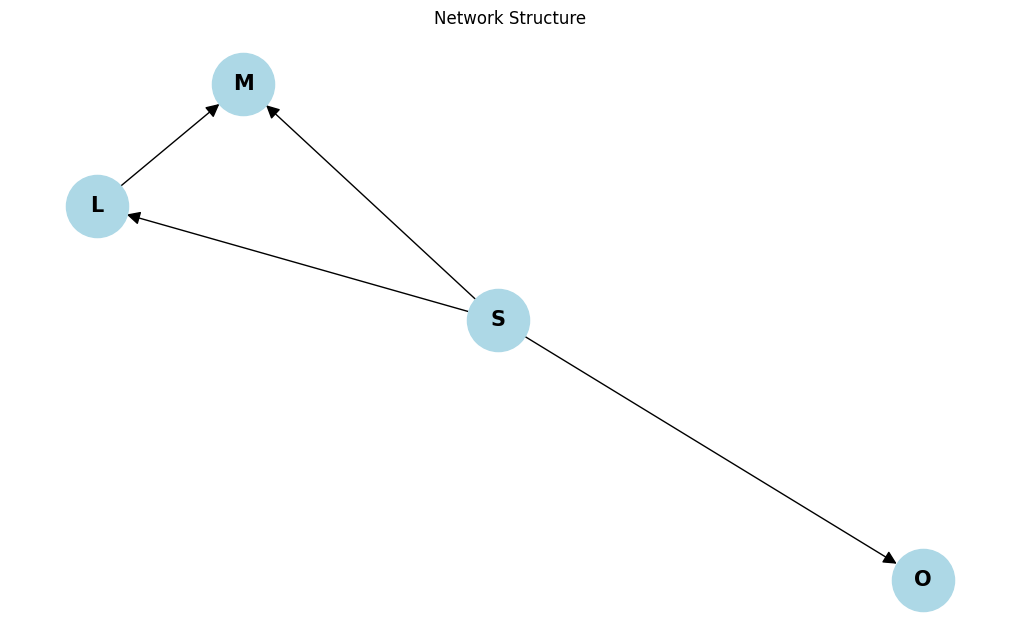

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

graph = nx.DiGraph()
graph.add_edges_from(model.edges())

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(graph) 
nx.draw(graph, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=15, font_weight='bold', arrowsize=20)

plt.title('Network Structure')
plt.show()

In [52]:
# P(S)
cp_s = TabularCPD(variable='S', variable_card=2, values=[[0.6], [0.4]])

# P(O | S)
# P(O=0 | S=0), P(O=0 | S=1)
# P(O=1 | S=0), P(O=1 | S=1)
cp_o = TabularCPD(variable='O', variable_card=2,
                    values=[[0.9, 0.3],  
                            [0.1, 0.7]], 
                    evidence=['S'], evidence_card=[2])

# P(L | S)
# P(L=0 | S=0), P(L=0 | S=1)
# P(L=1 | S=0), P(L=1 | S=1)
cp_l = TabularCPD(variable='L', variable_card=2,
                    values=[[0.7, 0.2],  
                            [0.3, 0.8]], 
                    evidence=['S'], evidence_card=[2])

# P(M | S, L)
# P(M=0 | S=0, L=0), P(M=0 | S=0, L=1), P(M=0 | S=1, L=0), P(M=0 | S=1, L=1)
# P(M=1 | S=0, L=0), P(M=1 | S=0, L=1), P(M=1 | S=1, L=0), P(M=1 | S=1, L=1)
cp_m = TabularCPD(variable='M', variable_card=2,
                    values=[[0.8, 0.4, 0.5, 0.1],   
                            [0.2, 0.6, 0.5, 0.9]],  
                    evidence=['S', 'L'], evidence_card=[2, 2])

model.add_cpds(cp_s, cp_o, cp_l, cp_m)
model.check_model()

inference = VariableElimination(model)

prob_spam = inference.query(variables=['S'], evidence={'O': 1, 'L': 1, 'M': 1})
print(prob_spam)


+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0508 |
+------+----------+
| S(1) |   0.9492 |
+------+----------+


In [50]:
print(model.local_independencies(['S', 'O', 'L', 'M']))

(O ⟂ L, M | S)
(L ⟂ O | S)
(M ⟂ O | L, S)
